# Homework 6: Hypothesis Testing, P-Hacking, and Simple Linear Regression 
***

**Name**: Javier Ramirez

**Section**: 001
***

This assignment is due on Moodle by **5pm on Friday December 1st**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [74]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy import stats 
%matplotlib inline

### [15 points] Problem 1 - Hypothesis Testing: Find-the-Knowledge-Bug 
***

As part of your job as a seasoned data science consultant, companies often bring you in to supervise their less-experienced data science teams before new product roll-outs.  One one such occasion, you are hired by a medium-sized internet-sales company that is preparing to release a new line of smart-home products.  Prior to their product release the company wants to do a targeted ad campaign to drive traffic to their site on launch day. 

You are asked to pair-up and do some inference work with a new employee named Stevey McKnowsNoStats. At various points in your day you catch Stevey making the following mistakes.  In each case, clearly explain to Stevey why his testing setup or conclusion is incorrect. 

**Part A**: Stevey has pulled up some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the mean age of customers that visit the site.  Let $X$ be the random variable describing the age of a site visitor and suppose that the population mean for $X$ is $\mu$. In particular, Stevey wants to see if the data suggests that the mean age of their customers is under 30 years old.   He decides to perform the test with a null hypothesis of $H_0: \bar{x} = 30$. 

Stevey should use is the population mean for X instead of $\bar x$, where X is the random variable of a the age of site visitors, which is $\mu$. For the hypothesis he should use $\mu$ instead of $\bar x$. Stevey should also use the sample mean alternatively for population mean for the null hypothesis.  

**Part B**: After the wonderful explanation you gave him after the previous debacle, Stevey has seen the error in his ways and decides instead to do his hypothesis test with a null hypothesis of $H_0: \mu < 30$.  

Since the null hypothesis is said to be true from the start, and the target for hypothesis testing from the data sample, determines if there is an alternate hypothesis can be found from the data; this mean we then have to reject the first null hypothesis. Since Stevey wants to know the mean age of customers are under 30 years old, the alterate hypothesis he should have is $H_1: \mu < 30$. Then the null hypothesis should be $H_0: \mu = 30$.

**Part C**: Finally on track with reasonable hypotheses of $H_0: \mu = 30$ and $H_1: \mu < 30$, Stevey computes a normalized test-statistic of $z = -1.35$ for the mean age and concludes that since $z = -1.35 < 0.05$ there is sufficient statistical evidence at the $\alpha = 0.05$ significance level that the mean age of their customers is less than 30.  

In [75]:
print("-z_a:", stats.norm.ppf(0.05))

-z_a: -1.64485362695


If z is equal to $-1.35$ then $z = -1.35 \leq -1.64$, This tells us about the means that we can't reject the null hypothesis, so Stevey can't come to the conclusion that the mean age of the customers is less then 30.

**Part D**: This time, with the hypotheses again $H_0: \mu = 30$ and $H_1: \mu < 30$, Stevey computes a p-value of $0.03$, and thus concludes that there is only a 3% probability that the null hypothesis is true. 

Stevey is not correct about the p-value. The null hypothesis would say that the p-value is the probability that the test statistic would be simalar to the one we computed. If p-value is small, we can reject the null hypothesis. Having a p-value be 0.03 says that their is a 3% chance of having a test statistic similar to the one we computed, by assuming the null hypothesis is true.

### [10 points] Problem 2 - Scientists vs. P-Values 
***

Read the following article from **FiveThirtyEight**: [Statisticians Found One Thing They Can Agree On: It's Time to Stop Misusing P-Values](http://fivethirtyeight.com/features/statisticians-found-one-thing-they-can-agree-on-its-time-to-stop-misusing-p-values/). In what ways are scientists misusing p-values?  What suggestions are being made to use them properly? 

The ways that scientist are misusing p-values are: the conception that p-values can tell you the probability that a result occurred by chance, p-values don’t tell you the measure the probability that the studied theory is correct, or the probability that the data were developed by random chance only and p-values also don’t how important the results are. The suggestions that are being made to use them properly is that the solution is not to reform p-values or to replace them with other probable encapsulation, but to progress toward a greater acceptance of unpredictable  and contribute to the variations. 

### [20 points] Problem 3 - Evaluating Pizza Delivery Performance 
***

The manager of a pizza chain with multiple locations likes to keep meticulous data on his pizza deliveries.  The data from more than 1200 deliveries in May 2014 is stored in pizza.csv. Load this data into a Pandas DataFrame. 

In [76]:
web = 'https://raw.githubusercontent.com/chrisketelsen/csci3022/master/hmwk/hmwk06/data/pizza.csv'
dfPizza = pd.read_csv(web)
dfPizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 9 columns):
day            1266 non-null object
date           1266 non-null object
time           1266 non-null float64
operator       1266 non-null object
branch         1266 non-null object
driver         1266 non-null object
temperature    1266 non-null float64
bill           1266 non-null float64
pizzas         1266 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 89.1+ KB


**Part A**: The manager's goal is to have an average delivery time across all branches of less than 30 minutes.  Perform an appropriate hypothesis test at the $\alpha=0.05$ significance level to evaluate whether this goal has been achieved.  Be sure to clearly state your null and alternate hypothesis, describe your testing procedure, and show all calculations in Python. 

$$
z = \frac{\bar{x} - \mu} {\frac{\sigma}{\sqrt{n}}}
$$

In [77]:
z_o = stats.norm.ppf(0.05)

s = dfPizza["time"].std()
m = dfPizza["time"].mean()
n = dfPizza["time"].count()

z = (m - 30)/(s/n**(.5))
print("number of deliveries: {}".format(n))
print("z: {}".format(z))
print("-z_a: {}".format(z_o))
print("standard deviation of delivery time: {}".format(s))
print("mean (average delivery time): {}".format(m))

number of deliveries: 1266
z: -3.171207747489349
-z_a: -1.6448536269514729
standard deviation of delivery time: 6.1115911859110374
mean (average delivery time): 29.4552940278904


- Null Hypothesis of $H_0$ is the pizzas are delivered in precisely 30 min to all places. 
- Alternate Hypothesis of $H_1$ is the pizzas are delivered in less than 30 min to all places.
- Since $z$ is less than $-z_a$, we can make with a good logic to reject the null hypothesis. 

**Part B**: The manager also has the goal of having an average delivery temperature across all branches of greater than 65F.  Perform an appropriate hypothesis test at the $\alpha=0.05$ significance level to evaluate whether this goal has been achieved.  Be sure to clearly state your null and alternate hypothesis, describe your testing procedure, and show all calculations in Python. 

$$z = \frac{\bar x - 65}{\frac{\sigma}{\sqrt{n}}}$$

In [78]:
z_o = stats.norm.ppf(0.05)
s = dfPizza["temperature"].std()
m = dfPizza["temperature"].mean()
n = dfPizza["temperature"].count()

z = (m - 65)/(s/n**(.5))
print("n: {}".format(n))
print("z: {}".format(z))
print("z_a: {}".format(-z_o))
print("standard deviation: {}".format(s))
print("mean (average delivery temperatures): {}".format(m))

n: 1266
z: 1.3820886485016115
z_a: 1.6448536269514729
standard deviation: 7.066708813711673
mean (average delivery temperatures): 65.27449614117367


- Null Hypothesis of $H_0$ is the pizzas are delivered with temperature of 65F to all places. 
- Alternate Hypothesis of $H_1$ is the pizzas are delivered with temperature greater than 65F to all places.
- Since $z$ is less than $z_a$, we can't make with a good logic to reject the null hypothesis.  

**Part C**: The manager has enough money to give one of his delivery drivers a raise based on good performance. He knows from the data that his two best drivers are Mario and Luigi, but he's not sure if there is evidence that either one is better than the other.  Using delivery time and temperature as the criteria, perform any necessary hypothesis tests at the $\alpha = 0.05$ significance level, to determine if one of the drivers deserves a raise. Be sure to clearly describe your hypotheses and methodology, and show any relevant computations in Python. 

- The manager can check if their is enough difference between the two drivers or not. Then he can determine which one deserves a raise.
- The null hypothesis of $H_0: \mu (mario) - \mu (luigi) =0$
- The alternative hypothesis of $H_1: \mu (mario) - \mu (luigi) \not = 0$

I will be using the p-test for the difference between the means of the two drivers, then it will be more clear to see when we would want to or not want to, reject the null hypothesis, we can then be more accurate to determine which driver had a better performance by using serveral p-test.

In [163]:
dfPizza_Mario = dfPizza.loc[dfPizza["driver"] == "Mario"]
dfPizza_Luigi = dfPizza.loc[dfPizza["driver"] == "Luigi"]
Luigi_mean_Time = dfPizza_Luigi["time"].mean()
Luigi_std_Time = dfPizza_Luigi["time"].std()
Luigi_n = dfPizza_Luigi["time"].count()
Mario_mean_Time = dfPizza_Mario["time"].mean()
Mario_std_Time = dfPizza_Mario["time"].std()
Mario_n = dfPizza_Mario["time"].count()  
lui = (Luigi_std_Time**2/Luigi_n)
za_Mean_Time = (Mario_mean_Time - Luigi_mean_Time)/np.sqrt((Mario_std_Time**2/Mario_n) + lui)
p_Mean_Time = 2 * stats.norm.cdf(-abs(za_Mean_Time))
print("Since the value we get is ", p_Mean_Time, "it is larger than 0.05, so we fail to reject the null hypothesis for the time")
Mario_mean_Temp = dfPizza_Mario["temperature"].mean()
Mario_std_Temp = dfPizza_Mario["temperature"].std()
Luigi_mean_Temp = dfPizza_Luigi["temperature"].mean()
Luigi_std_Temp = dfPizza_Luigi["temperature"].std()
mar = (Luigi_std_Temp**2/Luigi_n)
za_Mean_Temp = (Mario_mean_Temp - Luigi_mean_Temp)/np.sqrt((Mario_std_Temp**2/Mario_n) + mar)
pMeanTemp = 2 * stats.norm.cdf(-abs(za_Mean_Temp))
print("Since the value we get is ", pMeanTemp, "it is larger than 0.05, so we fail to reject the null hypothesis for the temperature")

Since the value we get is  0.996516299573 it is larger than 0.05, so we fail to reject the null hypothesis for the time
Since the value we get is  0.338800921525 it is larger than 0.05, so we fail to reject the null hypothesis for the temperature


Since the values are greater than 0.05 we fail to reject the null hypothesis for the time and temperature. So their is not enough differece between the drivers performance, to figure out which driver gets a raise.

**Part D**: On the other hand, the manager suspects that Salvatore has been underperforming as a driver.  The manager has a policy that if a pizza takes 40 minutes or longer to be delivered, he has to fork over a free bottle of wine.  This policy is only financially viable for the pizza chain if they have give out free wine on less than 5% of all pizza deliveries.  Perform a hypothesis test at the $\alpha = 0.05$ significance level to determine if there is significant evidence that the proportion of Salvatore's deliveries that take longer than 40 minutes is greater than 5%.  

- The null hypothesis of $H_0: \hat p = 0.05$
- The alternative hypothesis of $H_1: \hat p > 0.05$
- We want to see if we can reject the null hypothesis for the alternative hypothesis, the proportion of Salvatore's deliveries that took 40 min or greater than 5%. If this is the case then it would not be in the company interest to still keep Salvatore.

In [80]:
dfPizza_Salvatore = dfPizza.loc[dfPizza["driver"] == "Salvatore"]
Salvatore_time = dfPizza_Salvatore.loc[dfPizza_Salvatore["time"] >= 40]
Salvatore_time = Salvatore_time["time"].count()
Salvatore_n = dfPizza_Salvatore["time"].count()
Salvatore_time = Salvatore_time / Salvatore_n
Salvatore_std = (Salvatore_time*(1-Salvatore_time)) / Salvatore_n
za = stats.norm.ppf(1-0.05)
Salvatore_Time = (Salvatore_time - a)/np.sqrt(Salvatore_std)
print("z_a = ", za)
print("z =", Salvatore_Time)
print("Salvatore deliveries that are over 40 minutes =", Salvatore_time)
print("Standard deviation = ", Salvatore_std)
print("Salvatore total of deliveries =", Salvatore_n)

z_a =  1.64485362695
z = 0.424847674536
Salvatore deliveries that are over 40 minutes = 0.0552325581395
Standard deviation =  0.000151691635642
Salvatore total of deliveries = 344


Since 0.42(z) is not greater than or equal to 1.64(z_a), we have failed to reject the null hypothesis, so there is not enough support, that more than 5% of Salvatore's deliveries take 40 min or longer. So the company can still keep him without losing money.

### [15 points] Problem 4 - Naps vs Coffee for Memory? 
***

The consumption of coffee to benefit alertness is a common activity practiced by 90% of adults in North America. Often coffee is used to replace the need for sleep. One recent study compares students’ ability to recall memorized information after either the consumption of coffee or a brief nap. A random sample of 24 adults
were randomly divided into two groups and verbally given a list
of 25 words to memorize. During a break, one of the groups took a nap for an hour and a half,
another group stayed awake and were given a coffee an hour prior to testing. Researchers measured the number of words participants were
able to recall following the break. The summary statistics for the two groups are shown below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Nap} & 12 & 15.5 & 3.2 \\ 
\textrm{Coffee} & 12 & 12.25 & 3.1 \\ 
\end{array}
$$

In previous experiments the mean recall measurement was found to be normally distributed. 

**Part A**: Compute a 95% t-confidence interval for the mean recall measurement for participants that took a nap before the test. Do all computations in Python. 

In [81]:
z = stats.t.ppf(0.975,11)
lnap = 15.5 - (z * 3.2 / 12**(.5))
rnap = 15.5 + (z * 3.2 / 12**(.5))
print("95% t-confidence interval of recall because of Naps: [{},{}]".format(lnap,rnap))

95% t-confidence interval of recall because of Naps: [13.46681700054998,17.53318299945002]


**Part B**: Is there sufficient evidence, at the $\alpha = 0.5$ significance level, to conclude that taking a nap promotes better memory recall that drinking coffee?  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python. 

- Null hypothesis of $H_0: \mu_{nap-recall} - \mu_{coffee-recall} = 0$
- Alternate hypothesis of $H_1: \mu_{naprecall} - \mu_{coffeerecall} > 0$
- The null hypothesis is if their memory recall mean is zero. It is not zero when the recall of Naps group minus the coffee group is greater than zero.

In [82]:
z = (15.5 - 12.25) / np.sqrt(3.2**2/ 12 + 3.1**2/12)
s = stats.t.cdf(z, 11)
t_test = 1 - s
print("We can not reject the hypothesis that nap promotes better memory recall that drinking coffee since the value we get is {} which is smaller than 0.05.".format(t_test))

We can not reject the hypothesis that nap promotes better memory recall that drinking coffee since the value we get is 0.014063236011387481 which is smaller than 0.05.


**Part C**: Compute a 95% confidence interval for the standard deviation of memory recall for coffee drinkers. Do all computations in Python.  

In [83]:
n = 12
left = np.sqrt((n-1)*3.1**2) / np.sqrt(stats.chi2.ppf(0.975,n-1))
right = np.sqrt((n-1)*3.1**(2)) / np.sqrt(stats.chi2.ppf(0.025,n-1))
print("95% t-confidence interval of recall for coffee groups: [{},{}]".format(left,right))

95% t-confidence interval of recall for coffee groups: [2.1960249676730244,5.263421854944418]


- $\sqrt{\frac{(n-1)S^2}{X_{\alpha/2,~n-1}^2}} < \sigma < \sqrt{\frac{(n-1)S^2}{X_{1-\alpha/2,~n-1}^2}}$
- $S^2=3.1^2=9.61$ to get the confidence interval we are going to use the connfidence interval for standard deviation.

### [20 points] Problem 5 - Bad Science for Fun and Profit 
***

[Data Dredging](https://en.wikipedia.org/wiki/Data_dredging) and [p-hacking](https://www.explainxkcd.com/wiki/index.php/882:_Significant) are umbrella terms for the dangerous practice of automatically testing a large number of hypotheses on the entirety or subsets of a single dataset in order to find statistically significant results. In this exercise we will focus on the idea of testing hypotheses on subsets of a single data set.  

Johnny Nefarious has landed his first data science internship at an online marketing firm.  His primary summer project has been to design and test a new email advertisement for his company's best-selling product. To test his advertisement his supervisors have allowed him to send his ad to 4 targeted customer groups of 50 people every day for a month. 

The effectiveness of online advertising is typically measured by the ad's [click-through rate](https://en.wikipedia.org/wiki/Click-through_rate) (CTR), which is defined to be the _proportion_ of users that click on an advertisement. The company's standard email advertisement has a CTR of $0.05$.  Johnny is hoping to land a permanent position at the company when he graduates, so he's **really** motivated to show his supervisors that the CTR of his email advertisement is a (statistically) significant improvement over their previous ad. 

The data from Johnny's summer experiment can be found in email.csv. Load this dataset into Pandas. 

In [84]:
web = 'https://raw.githubusercontent.com/chrisketelsen/csci3022/master/hmwk/hmwk06/data/email.csv'
dfEmail = pd.read_csv(web)
dfEmail.head()

,Group,Date,Sent,Clicked
0,1,NaN,50,1
1,1,Oct 2 2017,50,2
2,1,Oct 3 2017,50,4
3,1,NaN,50,5
4,1,Oct 5 2017,50,1


**Part A**: State the null and alternate hypotheses that Johnny should test to see if his ad campaign is an improvement over the company's standard mailer with a CTR of $0.05$. 

- The null hypothesis of $H_0: \hat p = 0.05$
- The alternate hypothesis of $H_1: \hat p > 0.05$
- The company standard of 0.05 is equal to the CTR of his ad campaign if the null hypothesis and the alternate hypothesis being the CTR that Johnny's ad campaign is greater then the company's standard.

**Part B**: Test the hypothesis from **Part A** at the $\alpha = 0.05$ significance level using a p-value test. Is there sufficient evidence for Johnny to conclude that his ad campaign is an improvement?   

In [85]:
Email_total = dfEmail["Sent"].sum()
section_of_email = dfEmail["Clicked"].sum()/Email_total
section_std = (section_of_email*(1-section_of_email))/Email_total
Email_z = (section_of_email - 0.05)/np.sqrt(section_std)
Email_p = 1-stats.norm.cdf(Email_z)
print ("p-value:", Email_p)

p-value: 0.228755715506


Since the p-value is 0.229 is greater than 0.05 we fail to reject the null hypothesis. thus this means Johnny's ad campaign's CTR has not made a posative change to the company's standard CTR.   

**Part C**: Bummer, Johnny thinks. This is the part where he decides to resort to some questionable science.  Maybe there is a reasonable subset of the data for which his alternative hypothesis is supported?  Can he find it?  Can he come up for a reasonable justification for why this subset of the data should be considered while the rest should be discarded? 

Here are the **rules**: Johnny cannot modify the original data (e.g. by adding nonexistent clicks to certain groups or days) because his boss will surely notice.  Instead he needs to find a subset of the data for which his hypothesis is supported by a p-value test at the $\alpha = 0.05$ significance level _and_ be able to explain to his supervisors why his sub-selection of the data is reasonable.  

In addition to your explanation of why your successful subset of the data is potentially reasonable, be sure to thoroughly explain the details of the tests that you perform and show all of your Python computation.  

In [162]:
mailed = dfCTR["Sent"].sum()
click = dfCTR["Clicked"].sum()
percent_STD = (click / mailed) * (1 - (click / mailed)) / mailed
zalphaCTR = ((click / mailed) - 0.05) / percent_STD**(.5)
pvCTR = 1 - stats.norm.cdf(zalphaCTR)
print("p: {}".format(pvCTR))
print("::::::::::::::::::::::::::::")

gr1 = dfCTR.loc[dfCTR["Group"] == 1]
mailed_1 = gr1["Sent"].sum()
click_1 = gr1["Clicked"].sum()
percent_STD_1 = (click_1 / mailed_1) * (1 - (click_1 / mailed_1)) / mailed_1
za1 = ((click_1 / mailed_1) - 0.05) / percent_STD_1**(.5)
pv1 = 1 - stats.norm.cdf(za1)
print("proportion for group 1 CTR: {}".format(click_1 / mailed_1))
print("p-value 1: {}".format(pv1))
print("::::::::::::::::::::::::::::")

gr2 = dfCTR.loc[dfCTR["Group"] == 2]
mailed_2 = gr2["Sent"].sum()
click_2 = gr2["Clicked"].sum()
percent_STD_2 = (click_2 / mailed_2) * (1 - (click_2 / mailed_2)) / mailed_2
za2 = ((click_2 / mailed_2) - 0.05) / percent_STD_2**(.5)
pv2 = 1 - stats.norm.cdf(za2)
print("proportion for group 2 CTR: {}".format(click_2 / mailed_2))
print("p-value 2: {}".format(pv2))
print("::::::::::::::::::::::::::::")

gr3 = dfCTR.loc[dfCTR["Group"] == 3]
mailed_3 = gr3["Sent"].sum()
click_3 = gr3["Clicked"].sum()
percent_STD_3 = (click_3 / mailed_3) * (1 - (click_3 / mailed_3)) / mailed_3
za3 = ((click_3 / mailed_3) - 0.05) / percent_STD_3**(.5)
pv3 = 1 - stats.norm.cdf(za3)
print("proportion for group 3 CTR: {}".format(click_3 / mailed_3))
print("p-value 3: {}".format(pv3))
print("::::::::::::::::::::::::::::")

gr4 = dfCTR.loc[dfCTR["Group"] == 4]
mailed_4 = gr4["Sent"].sum()
click_4 = gr4["Clicked"].sum()
percent_STD_4 = (click_4 / mailed_4) * (1 - (click_4 / mailed_4)) / mailed_4
za4 = ((click_4 / mailed_4) - 0.05) / percent_STD_4**(.5)
pv4 = 1 - stats.norm.cdf(za4)
print("proportion for group 4 CTR: {}".format(click_4 / mailed_4))
print("p-value 4: {}".format(pv4))

p: 0.27432163580336966
::::::::::::::::::::::::::::
proportion for group 1 CTR: 0.0431578947368421
p-value 1: 0.8503115253278757
::::::::::::::::::::::::::::
proportion for group 2 CTR: 0.05
p-value 2: 0.5
::::::::::::::::::::::::::::
proportion for group 3 CTR: 0.07076923076923076
p-value 3: 0.01946757306887692
::::::::::::::::::::::::::::
proportion for group 4 CTR: 0.050666666666666665
p-value 4: 0.4668275519095737


We see that group 3 has the p-value of $0.019$ this is indeed lower than $0.05$ significance level. This means that we can reject the null hypothesis. Thus the best subset to use is from group 3's data which is supported by the alternate hypothesis.

### [20 points] Problem 6 - Simple Linear Regression for Gas Mileage 
***

The data in auto.csv contains information on cars from the 1970s and 1980s. In this exercise you will construct a simple linear regression model for the response variable mpg with horsepower as the feature. Load the data into a Pandas DataFrame.    


In [102]:
web = 'https://raw.githubusercontent.com/chrisketelsen/csci3022/master/hmwk/hmwk06/data/auto.csv'
dfAuto = pd.read_csv(web)
dfAuto.head()

,model,year,mpg,cylinders,horsepower,weight
0,chevrolet chevelle malibu,70,18.0,8,130.0,3504.0
1,buick skylark 320,70,15.0,8,165.0,3693.0
2,plymouth satellite,70,18.0,8,150.0,3436.0
3,amc rebel sst,70,16.0,8,150.0,3433.0
4,ford torino,70,17.0,8,140.0,3449.0


**Part A**: Perform a simple linear regression with horsepower as the feature and mpg as the response.  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python. 

In [149]:
bhat, ahat, rval, pval, stderr = stats.linregress(dfAuto["horsepower"],dfAuto["mpg"])
print('Fitted model: Y = {} + {}x'.format(ahat,bhat))

Fitted model: Y = 39.93586102117045 + -0.15784473335365354x


**Part B**: Make a scatter-plot of the data with horsepower as the feature and mpg as the response and overlay the estimated regression line. 


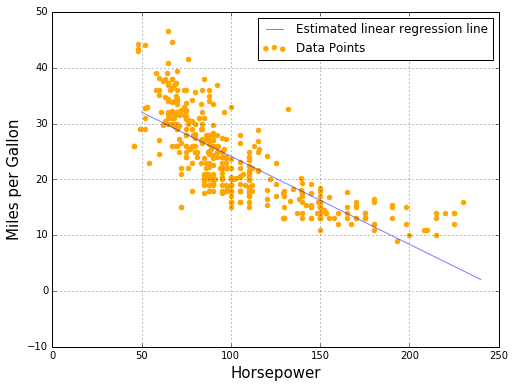

In [150]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(8,6))
x = np.linspace(50,240,50)
line = ax.plot(x,x*bhat+ahat,color="blue", alpha=0.5, label="Estimated linear regression line")
ax.set_xlabel("Horsepower", fontsize=15)
ax.set_ylabel("Miles per Gallon", fontsize=15);
ax.scatter(dfAuto["horsepower"],dfAuto["mpg"], color="orange", label="Data Points")
plt.grid()
plt.legend()

**Part C**: Is the relationship between horsepower and mpg positive or negative? Justify your response. 

The relationship between horsepower and mpg is negative. As the horsepower increased; mpg decreases. A stronger engine will use up fuel faster then a weaker engine. My explanation and graph both support my hypothesis.

**Part D**: Find a 95% confidence interval for the slope parameter.  Based on this confidence interval, is there sufficient evidence to believe, at the 95% confidence level, that there is a real relationship between horsepower and mpg? 

In [158]:
x = dfAuto["horsepower"]
y = dfAuto["mpg"]
a = 1-0.05 / 2
vertical = ahat + bhat*x
SSE = ((y-vertical)**(2)).sum()
n = dfAuto["horsepower"].count()
devhat = SSE / (n-2)
SEB = (devhat / ((x-np.mean(x))**(2)).sum())**(0.5)
print("SEB: {}".format(SEB))
ta = stats.t.ppf(a ,n-2)
comp = (ta * SEB)
CI_left = bhat - comp
CI_right = bhat + comp
print("z_alpha/2: ", ta)
print("95% t-confidence interval for slope parameter: [{}, {}]".format(CI_left,CI_right))

SEB: 0.006445500517685024
z_alpha/2:  1.9660653313
95% t-confidence interval for slope parameter: [-0.17051700846435686, -0.14517245824295022]


The confidence interval does not contain zero and the values are negative, because of this we can say the relationship between the miles per gallon (mpg) and horsepower represent a negative relationship.

**Part E**: Double-check your result from **Part D** by performing an equivalent hypothesis test.  Be sure to state your null and alternative hypotheses and explain your general methodology.  Do your conclusions agree with those made in **Part D**? 

In [159]:
n = dfAuto["horsepower"].count()
p = bhat / SEB
t_test = 2*(stats.t.cdf(p, n-2))
print("p-value:", t_test)

p-value: 7.0319890294e-81


- Null hypothesis of $H_0: \beta = 0$
- Alternate hypothesis of $H_1: \beta \neq 0$
- To see if our hypothesis is correct we need to reject the null hypothesis. This will tell us that their is indeed a relationship between miles per gallon (mpg) and horsepower if it not zero.
- Since in our p-value is less than 0.05, their is a relationship between miles per gallon (mpg) and horsepower.

In [160]:
n = dfAuto["horsepower"].count()
p = bhat / SEB
t_test = stats.t.cdf(t, n-1)
print("p-value:", t_test)

p-value: 2.98655687666e-81


- To further support our conclusion, we can so another hypothesis.
- Null hypothesis of $H_0: \beta = 0$
- Alternate hypothesis of $H_1: \beta < 0$
- This proves the slope is negative if we can reject the null hypothesis.
- Since the p-value is less than 0.05, we can reject the null hypothesis and this also shows there is a negative relationship between miles per gallon (mpg) and horsepower.

**Part F**: What gas mileage would your simple linear regression model predict for a car with a horsepower of $97$? 

In [155]:
m = ahat + 97*bhat
print("The gas mileage with my simple linear regression would predict for a car with a horsepower of 97 is:", m, "miles per gallon")

The gas mileage with my simple linear regression would predict for a car with a horsepower of 97 is: 24.6249218859 miles per gallon
